# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [21]:
import pandas as pd
import numpy as np
from scipy import stats

In [22]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [23]:
# number of callbacks for black-sounding names
print(sum(data[data.race=='w'].call))
print(sum(data[data.race=='b'].call))

235.0
157.0


In [24]:
#data.head()
data.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,...,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,3.618480,3.661396,7.842916,0.052772,0.411499,0.097125,0.448049,215.637782,3.481520,0.559548,...,0.106776,0.437166,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.714997,1.219126,5.044612,0.223601,0.492156,0.296159,0.497345,148.127551,2.038036,0.496492,...,0.308866,0.496083,0.259649,0.275854,0.171677,0.278932,0.410141,0.442847,0.361773,0.371308
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,44.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

Answer Q1:
Z-test 2-sample test would be appropriate to test the hypothesis.
As we are testing Hypothesis of how employers response to a resume and the data is generated by randomly assigning race 'b' and 'w' CLT doesn't apply here 

Answer Q2:

Null Hypothesis is: "Race has impact on callback rate for applicants"
    H0: proportion = 2678/2835 is significantly large proportion for race 'b' than 2600/2835 for race 'w', 
    In other words difference in proportion indicates bias
    
    
        
Alternate Hypothesis: Difference in Both proportions does NOT indicate any bias 

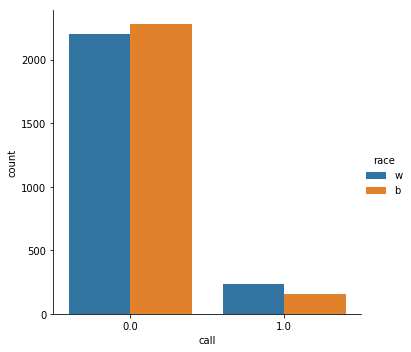

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

w = data[data.race=='w']
b = data[data.race=='b']

_ = sns.catplot(data=data,x='call', hue='race', kind='count')
#plt.axes()
#_ = sns.catplot(data=data,x='yearsexp', hue='race', kind='count', ax=plt.axes())
#_2 = sns.distplot(b,hist=True)

In [26]:
# Your solution to Q3 here
def calculate_proportion(data_1d):
    no_of_ones = np.sum(data_1d)
    #print(no_of_ones)
    return no_of_ones/len(data_1d)


def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

print('difference of proportion of black and white callbacks on resume - ', calculate_proportion(data[data.race=='b']['call']) - calculate_proportion(data[data.race=='w']['call']))

print(len(data))


"""
  Permutation test with test statistic of difference of proportions
"""



difference of proportion of black and white callbacks on resume -  -0.032032854209445585
4870


'\n  Permutation test with test statistic of difference of proportions\n'

In [27]:
from scipy.stats import ttest_ind

print(ttest_ind(data[data.race=='b']['call'], data[data.race=='w']['call']))


# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(data[data.race=='b']['call'], calculate_proportion, 100000)

# Compute and print SEM
sem = np.std(data[data.race=='b']['call']) / np.sqrt(len(data[data.race=='b']['call']))
print('black callback SEM - ', sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print('bootstrap std of black callbaclk rate', bs_std)

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean callbacks: empirical_diff_means
empirical_diff_means = diff_of_means(data[data.race=='b']['call'], data[data.race=='w']['call'])

print('empirical difference - ', empirical_diff_means)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(data[data.race=='b']['call'], data[data.race=='w']['call'],
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates <= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

Ttest_indResult(statistic=-4.114705290861751, pvalue=3.940802103128886e-05)
black callback SEM -  0.004977108869798699
bootstrap std of black callbaclk rate 0.00497567336715328
empirical difference -  -0.03203285485506058
p-value = 0.0


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

Question 4:
    Above p-value indicates that the difference in callback between black and white race sounding resumes is not by chance.
    Probability of Difference of callback rate among permutation replicates is almost zero. Hence the null hypothesis cannot be proved wrong
    
Question 5:
    Even though above analysis is based on effect of one parameter 'race' on callback rate, the data above has multiple parameters which might affect the callback rate.
    Like 'yearsofexp', 'education'.
    Further type of job if it is Bank, Trade or BusService might affect the callback rate where minimum education requiremennts and skills required are higher.